In [4]:
import pandas as pd
import nltk
import spacy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.metrics import classification_report

In [8]:
#load the dataset

#df = pd.read_csv("labelvader.csv")
df = pd.read_csv("sentiment-topic-test.tsv", sep="\t")


In [9]:
#load the models

nltk.download("vader_lexicon")

nlp = spacy.load("en_core_web_sm")
vader_model = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Austie\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
#VADER pipeline

def run_vader(textual_unit, lemmatize=True, parts_of_speech_to_consider=None):
    doc = nlp(textual_unit)
    input_to_vader = []

    for sent in doc.sents:
        for token in sent:
            to_add = token.lemma_ if lemmatize and token.lemma_ != '-PRON-' else token.text

            if parts_of_speech_to_consider:
                if token.pos_ in parts_of_speech_to_consider:
                    input_to_vader.append(to_add)
            else:
                input_to_vader.append(to_add)

    scores = vader_model.polarity_scores(' '.join(input_to_vader))
    return scores

def vader_output_to_label(vader_output):
    compound = vader_output['compound']
    if compound < 0:
        return 'negative'
    elif compound == 0.0:
        return 'neutral'
    else:
        return 'positive'

In [15]:
#Sentiment Analysis (test set)
texts = []
vader_predictions = []
gold_labels = []

for sentence in df["sentence"]:
    vader_output = run_vader(sentence)
    vader_label = vader_output_to_label(vader_output)
    texts.append(sentence)
    vader_predictions.append(vader_label)

gold_labels = df["sentiment"].tolist()



In [16]:
print("VADER Sentiment Classification Report:")
print(classification_report(gold_labels, vader_predictions))

VADER Sentiment Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00         6
     neutral       0.20      0.17      0.18         6
    positive       0.33      0.50      0.40         6

    accuracy                           0.22        18
   macro avg       0.18      0.22      0.19        18
weighted avg       0.18      0.22      0.19        18



In [13]:
misclassified = []

for i in range(len(texts)):
    if gold_labels[i] != vader_predictions[i]:
        misclassified.append((texts[i], gold_labels[i], vader_predictions[i]))

# display 10 misclassifications per class
positive_errors = [m for m in misclassified if m[1] == "positive"][:10]
neutral_errors  = [m for m in misclassified if m[1] == "neutral"][:10]
negative_errors = [m for m in misclassified if m[1] == "negative"][:10]

print("\nMisclassified Positive Tweets:")
for text in positive_errors:
    print(f"Tweet: {text[0]} \nExpected: {text[1]} VADER: {text[2]}\n{'-'*60}")

print("\nMisclassified Neutral Tweets:")
for text in neutral_errors:
    print(f"Tweet: {text[0]} \nExpected: {text[1]} VADER: {text[2]}\n{'-'*60}")

print("\nMisclassified Negative Tweets:")
for text in negative_errors:
    print(f"Tweet: {text[0]} \nExpected: {text[1]} VADER: {text[2]}\n{'-'*60}")


Misclassified Positive Tweets:
Tweet: The atmosphere at the stadium tonight was electric. 
Expected: positive VADER: neutral
------------------------------------------------------------
Tweet: It had me hooked from the first chapter. 
Expected: positive VADER: neutral
------------------------------------------------------------
Tweet: The author’s writing style is so unique – poetic, but not over the top. 
Expected: positive VADER: negative
------------------------------------------------------------

Misclassified Neutral Tweets:
Tweet: It’s more of a slow burn than a page-turner, but it’s well-written, I guess. 
Expected: neutral VADER: positive
------------------------------------------------------------
Tweet: It’s split into two timelines, which keeps it interesting but also a bit confusing at times. 
Expected: neutral VADER: negative
------------------------------------------------------------
Tweet: They rotated their squad for the cup game, which wasn’t surprising given the sc

VADER is misclassifying the test set words for a number of reasons:

Slight hints of positivity or negativity.
Tweet: The atmosphere at the stadium tonight was electric. 
Expected: positive VADER: neutral
VADER would see no strong sentiment words to indicate the tweet was positive. Therefore it was classed as Neutral.

Humor or sarcasm is also not detected by VADER:
Tweet: The only way it's helped me is by keeping my table from being wobbly.
Tweet was classed as neutral when expected was negative.
VADER doesn't understand the sarcasm and classed the tweet as neutral.

VADER has issues with negations and implications.
Certain words like Impressive or well-writen are in misclassified tweets and VADER tends to classify these wrong.

## Sentiment Analysis labelvader.csv file

In [17]:
df = pd.read_csv("labelvader.csv")

In [26]:
texts = []
vader_predictions = []
gold_labels = []

for sentence in df["Tweet"]:
    vader_output = run_vader(sentence)
    vader_label = vader_output_to_label(vader_output)
    texts.append(sentence)
    vader_predictions.append(vader_label)

gold_labels = df["sentiments"].str.lower().tolist()

In [27]:
print("VADER Sentiment Classification Report (Original):")
print(classification_report(gold_labels, vader_predictions))

VADER Sentiment Classification Report (Original):
              precision    recall  f1-score   support

    negative       0.24      0.18      0.20       271
     neutral       0.51      0.87      0.64       987
    positive       0.71      0.12      0.21       742

    accuracy                           0.50      2000
   macro avg       0.49      0.39      0.35      2000
weighted avg       0.55      0.50      0.42      2000



In [22]:
misclassified = []

for i in range(len(texts)):
    if gold_labels[i] != vader_predictions[i]:
        misclassified.append((texts[i], gold_labels[i], vader_predictions[i]))

# display 10 misclassifications per class
positive_errors = [m for m in misclassified if m[1] == "positive"][:10]
neutral_errors  = [m for m in misclassified if m[1] == "neutral"][:10]
negative_errors = [m for m in misclassified if m[1] == "negative"][:10]

print("\nMisclassified Positive Tweets:")
for text in positive_errors:
    print(f"Tweet: {text[0]} \nExpected: {text[1]} VADER: {text[2]}\n{'-'*60}")

print("\nMisclassified Neutral Tweets:")
for text in neutral_errors:
    print(f"Tweet: {text[0]} \nExpected: {text[1]} VADER: {text[2]}\n{'-'*60}")

print("\nMisclassified Negative Tweets:")
for text in negative_errors:
    print(f"Tweet: {text[0]} \nExpected: {text[1]} VADER: {text[2]}\n{'-'*60}")


Misclassified Positive Tweets:
Tweet:  toyotaavanzaa worksfess aku salfok sama ptnya keren bisa nembus hpm lion air 
Expected: positive VADER: neutral
------------------------------------------------------------
Tweet: kalau nyari cantik ada raline syah bisa dibahas single lagi kalau mau nyari kaya ada raline pimpinan lion air kalau mau nyari suara bagus ada lyodra bisa diact kenal lagi ngapain coba kalau bukan cari aman karena perihal kita mainnya delete akun yang 
Expected: positive VADER: neutral
------------------------------------------------------------
Tweet: seru juga liat orang orang debat soal pelayanan maskapai lcc apalagi lion air citilink 
Expected: positive VADER: neutral
------------------------------------------------------------
Tweet:  worksfess jan mau nanti dimintain duit deposito dengan alasan keperluan seragam dll aku pernah kena deket lion air tower harmoni dan mereka ini berkomplot sama preman cosplay satpam minimal ribu boleh angsur dan kudu kalo mau masuk ski

## Sentiment Analysis labelvader.csv file (English tweets)


In [28]:
texts = []
vader_predictions = []
gold_labels = []

for sentence in df["tweet_eng"]:
    vader_output = run_vader(sentence)
    vader_label = vader_output_to_label(vader_output)
    texts.append(sentence)
    vader_predictions.append(vader_label)

gold_labels = df["sentiments"].str.lower().tolist()

In [29]:
print("VADER Sentiment Classification Report (English):")
print(classification_report(gold_labels, vader_predictions))

VADER Sentiment Classification Report (English):
              precision    recall  f1-score   support

    negative       0.33      0.65      0.44       271
     neutral       0.67      0.53      0.59       987
    positive       0.59      0.55      0.57       742

    accuracy                           0.55      2000
   macro avg       0.53      0.57      0.53      2000
weighted avg       0.59      0.55      0.56      2000



We compared VADER's performance on two versions of the same dataset: one with original tweets and one with those tweets translated into English. The accuracy improved from 50% to 55%, and the F1-score for the “negative” class rose from 0.20 to 0.44. This highlights that VADER, being a rule-based system optimized for English, benefits from input that conforms to standard English syntax and vocabulary. Translation acts as a kind of preprocessing step that aligns input with VADER's expectations, improving results.


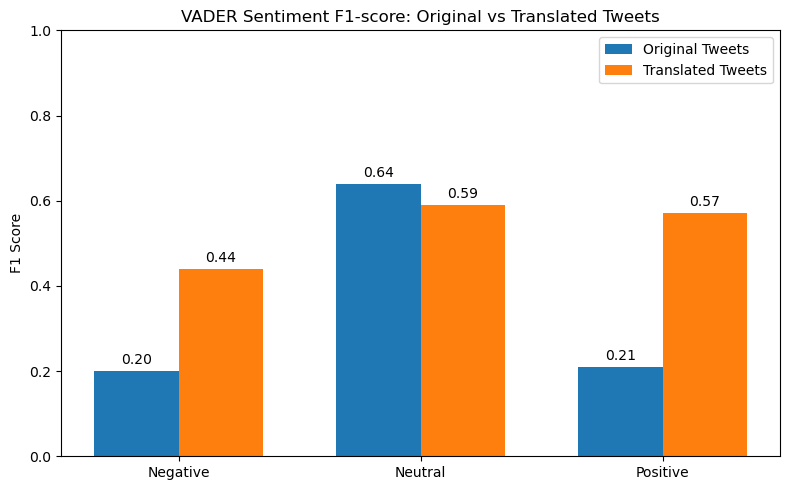

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Sentiment labels
labels = ['Negative', 'Neutral', 'Positive']

# F1-scores for each sentiment
f1_original = [0.20, 0.64, 0.21]
f1_translated = [0.44, 0.59, 0.57]

x = np.arange(len(labels))  # label locations
width = 0.35  # width of the bars

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, f1_original, width, label='Original Tweets')
bars2 = ax.bar(x + width/2, f1_translated, width, label='Translated Tweets')

# Labels and title
ax.set_ylabel('F1 Score')
ax.set_title('VADER Sentiment F1-score: Original vs Translated Tweets')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Show exact values on top of bars
for bar in bars1 + bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.2f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # offset
                textcoords="offset points",
                ha='center', va='bottom')

plt.ylim(0, 1)
plt.tight_layout()
plt.show()